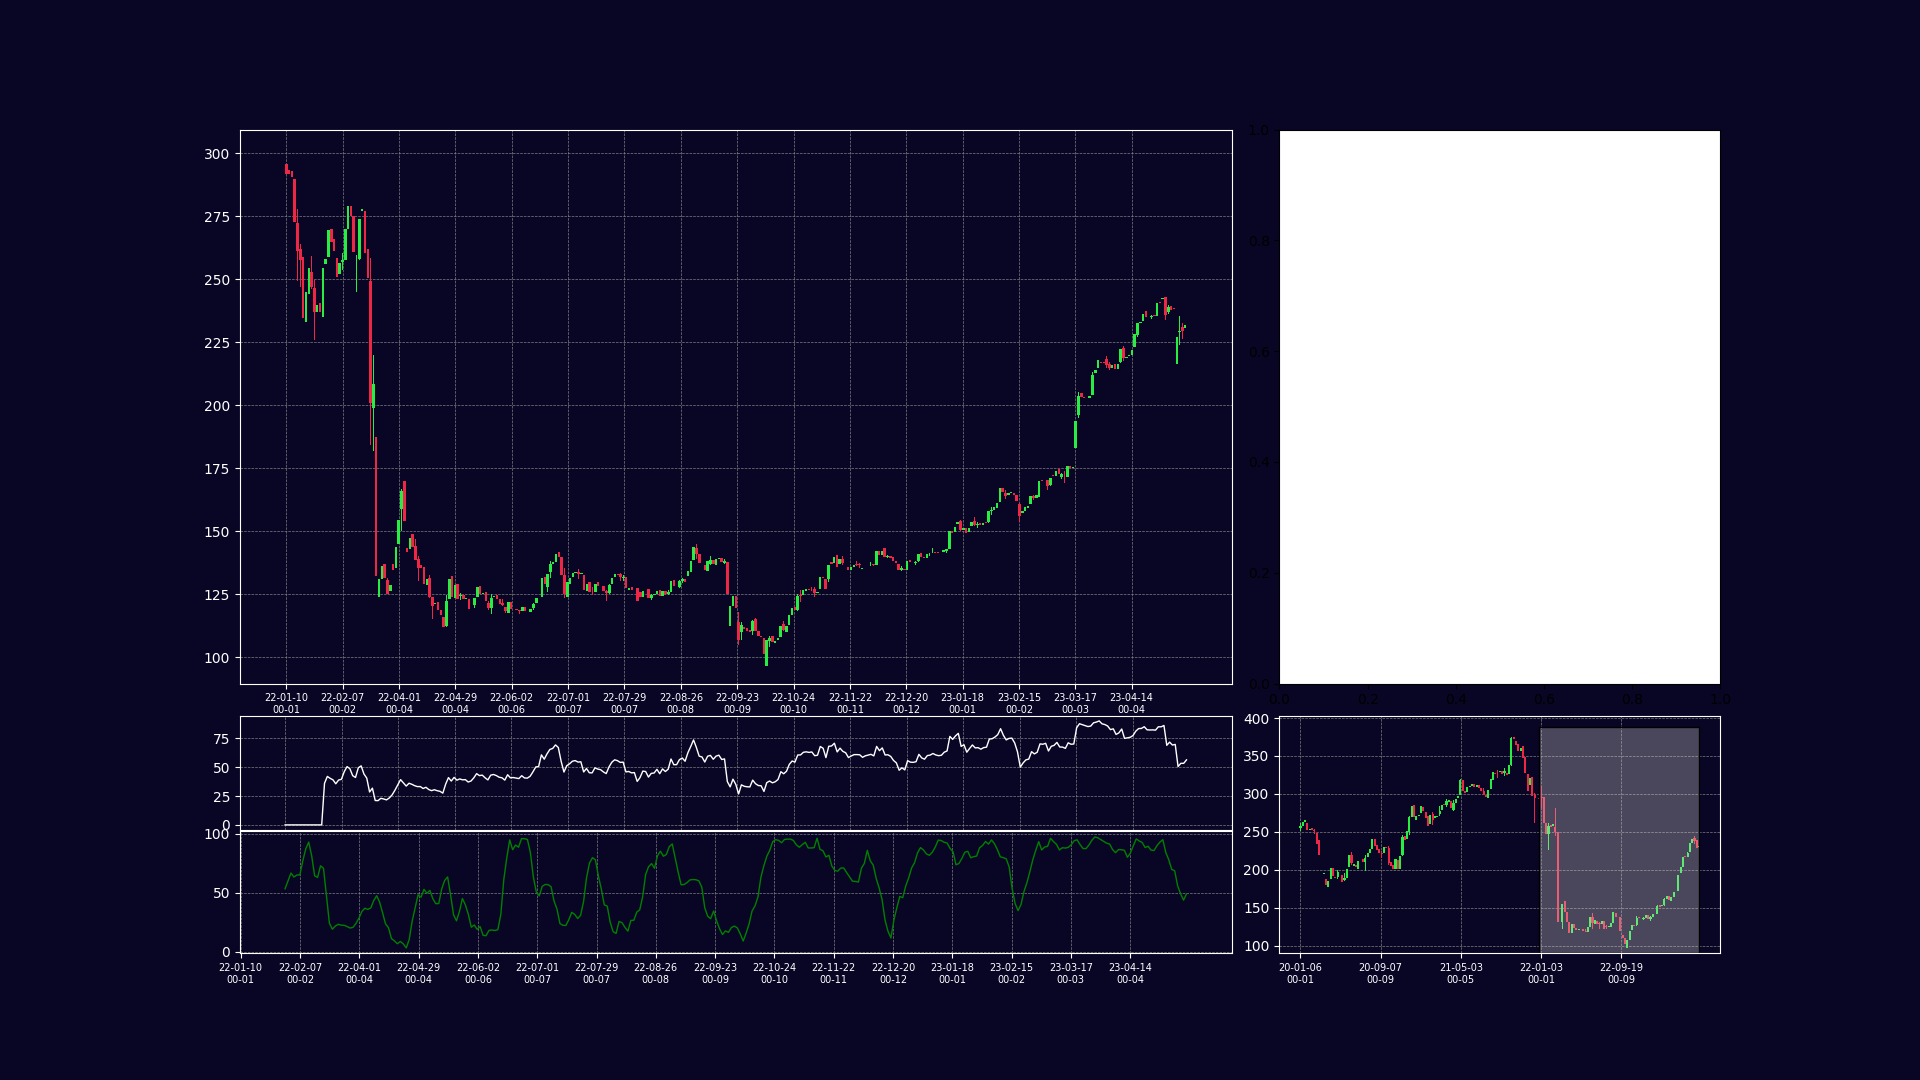

In [9]:
from matplotlib.widgets import Slider
import numpy as np
import scipy as sp
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import ipywidgets as widgets

import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
AutoMinorLocator)
import urllib.parse
import urllib.request
import string
from distutils.dir_util import mkpath

import finam_parser.tti as tti
from finam_parser.query_classes import *
import finam_parser.http_queries as queries
from finam_parser.pyplot_classes import *
import finam_parser.calc_inds as calc_inds

import finam_parser.file_work as fw
%matplotlib widget
#--------------------------------------------------------------------------------------------------------v

def draw(prices):
    shape_candle = Candle()
    shape_line_ind = Line()
    shape_line_ind2 = Line()
    
    main_figure = MainFigure()
    parts = grid_type3(main_figure, 2, interval_x=6, interval_y=4)
    parts_ax = [main_figure.fg.add_subplot(p) for p in parts]
    
    prices_main = prices[0]
    prices_second = prices[1]

    main_figure.draw_subplot(parts_ax[0], Candle(), prices_main, count_x=16)
    main_figure.draw_subplot(parts_ax[len(parts_ax) - 1], shape_candle, prices_second,  count_x=5)
    fg_ax_last = parts_ax[len(parts_ax) - 1]
    #------------------------------------------------------------------------------------------------
    rsi_frame = calc_inds.insert_ind_column(tti.indicators.RelativeStrengthIndex, prices_main)
    
    shape_line_ind.change_columns(fw.COL_NAMES.date_to_plot, rsi_frame.columns[len(rsi_frame.columns) - 1])
    shape_line_ind.color = 'white'

    main_figure.draw_subplot(parts_ax[2], shape_line_ind, rsi_frame, count_x=16)
    # shape_line.color = 'yellow'
    # main_figure.draw_subplot(shape_line, rsi_frame, parts[2], count_x=16)
    #------------------------------------------------------------------------------------------------
    stoch_frame = calc_inds.insert_ind_column(tti.indicators.StochasticOscillator, prices_main)
    shape_line_ind2.change_columns(fw.COL_NAMES.date_to_plot, stoch_frame.columns[len(stoch_frame.columns) - 1])
    shape_line_ind2.color = 'green'

    main_figure.draw_subplot(parts_ax[3], shape_line_ind2, stoch_frame, count_x=16)
    #------------------------------------------------------------------------------------------------
    #!ANOTHER FIGURES
    mn_y_second = shape_candle.get_min_y(prices_second)
    mx_y_second = shape_candle.get_max_y(prices_second)

    rect = Rect()
    real_rect = rect.get_rect_percent(prices_second, 'left', GLOBAL_HIGHER_TF_PERCENTAGE, 'left', mn_y_second, mx_y_second)
    rect.draw_rect(fg_ax_last, real_rect)
    

async def main():
    global prices
    download_path = './DATA/'
    mkpath(download_path)
    #----------------------------------------------------------------------------------------------------s
    sber2 = MoexQuery('SBER', '2022-01-10', '2023-05-15', Period.day, download_path)
    prices = await MoexQuery.multi_export_to_df([sber2, sber2.create_higher_TF_query()])
    draw(prices)
    #plt.show()
await main()


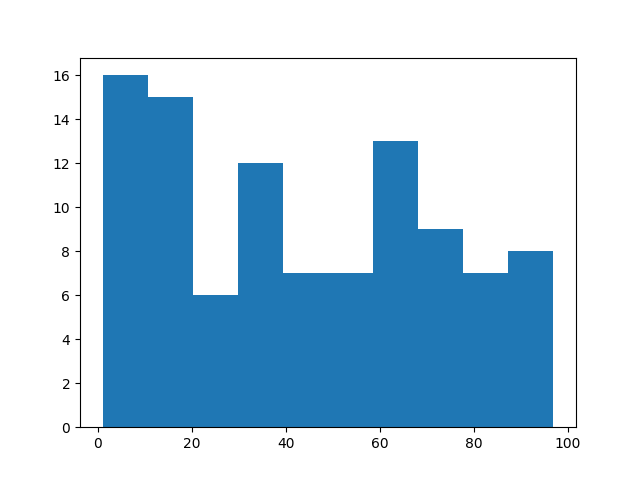

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
data = np.random.randint(0, 100, 100)

fig, ax = plt.subplots()
ax.hist(data, bins=10)

def onclick(event):
    width = ax.patches[0].get_width()
    start = ax.patches[0].get_x()
    end = start + width * 10  # Полагаем 10 попаа
    if event.xdata is not None and event.inaxes == ax:
        if event.xdata < start:
            new_xlim = (event.xdata, end)
        elif event.xdata > end:
            new_xlim = (start, event.xdata)
        else:
            return
        plt.xlim(new_xlim)
        plt.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
